In [1]:
from src.utils import data_load
import pandas as pd
from src.s3_utils import pandas_from_csv_s3
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from utils import get_survey_question, na_rate

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-yfd24_1m because the default path (/home/ubuntu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
data = data_load(data_keys={'bodyport', 'oura_activity', 'oura_sleep', "surveys"}, wave=7)


In [6]:
df_birth = data_load(data_keys={"birth"}, wave=5)['birth']

In [26]:
# mast_mat: shape Txd
def get_usable_window(mask, window_size=21, tolerance=2):
    result_windows = []
    T = len(mask)
    i=0
    while i < (T - window_size + 1):
        curr_window = np.array(mask[i:i+window_size])
        # usable
        if np.sum(curr_window) < tolerance:
            result_windows.append((i, i+window_size))
            i += window_size
        else:
            # add tolerance window
            tolerance_window = np.array(mask[i:i+window_size+tolerance])
            miss_idx = np.where(tolerance_window == 1)[0]
            print(len(miss_idx))
            tolerance_counter = 0
            early_stop = False
            stop_idx = None
            for j in range(len(miss_idx) - 1):
                if miss_idx[j] + 1 == miss_idx[j + 1]:
                    tolerance_counter += 1
                else:
                    tolerance_counter = 0
                if tolerance_counter >= tolerance:
                    early_stop = True
                    stop_idx = j + 1
                    # break
            if early_stop:
                i += stop_idx + 1
            else:
                # usable
                result_windows.append((i, i+window_size))
                i += window_size
    return result_windows

my_mask = [0,0,0,0,0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print(my_mask)
get_usable_window(my_mask)
        


[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3
3
4
2


[(9, 30)]

In [ ]:
def generate_csv_for_user(selected_user, preset_start_date=datetime(2009, 10, 12, 10, 10), preset_end_date=datetime(2030, 10, 12, 10, 10), file_name=''):
    import numpy as np
    import pandas as pd
    # selected_user = 1441
    print(f"Curr user: {selected_user}")
    root_folder = file_name
    selected_data_bodyport = data_bodyport[data_bodyport['user_id'] == selected_user][['date', 
    # 'impedance_ratio', 
    # 'peripheral_fluid', 
    'impedance_mag_1_ohms', 'impedance_phase_1_degs', 
    'weight_kg']].groupby("date", as_index = False).mean()
    selected_data_bodyport.to_csv('/mnt/test4.csv')

    data_oura_activity = data['oura_activity']
    data_oura_sleep = data['oura_sleep']
    data_survey = data['surveys']
    survey_question_str = 'swollen'
    data_edema = pd.read_csv()

    selected_data_edema = data_edema[data_edema['user_id'] == selected_user][['date', 'answer_text']].groupby("date", as_index = False).last()
    selected_data_edema['answer_text'] = selected_data_edema['answer_text'].astype('int')
    selected_data_edema.to_csv('/mnt/test3.csv')
    selected_data_oura_sleep = data_oura_sleep[data_oura_sleep['user_id'] == selected_user][['breath_average', 'date']]
    selected_data_oura_activity = data_oura_activity[data_oura_activity['user_id'] == selected_user][[
    # 'cal_active',
    'cal_total',
    'daily_movement',
    'high',
    'inactive',
    'low',
    'medium',
    'non_wear',
    'rest',
    'steps',
    'date']]


    def get_min_date(df):
        return np.min(df['date'].astype('datetime64'))
    def get_max_date(df):
        return np.max(df['date'].astype('datetime64'))
    
    if not len(selected_data_bodyport):
        print("Empty bodyport")
        return
    if not len(selected_data_oura_activity):
        print("Empty Oura activity")
        return
    if not len(selected_data_edema):
        print("Empty Edema")
        return
    if not len(selected_data_oura_sleep):
        print("Empty Oura sleep")
        return
    def na_rate(df):
        if not len(df): return 1
        return np.max(np.sum(df.isna()))/len(df)


In [5]:
# data = data_load(data_keys={'bodyport', 'oura_activity', 'oura_sleep', "surveys"}, wave=6)
data = data_load(data_keys={'bodyport'}, wave=7)
df_birth = data_load(data_keys={'birth'}, wave=5)['birth']
df_oura_activity = data_load(data_keys={"oura_activity"}, wave=7)["oura_activity"]


In [54]:
df_garmin_activity = data_load(data_keys={"garmin_activities"}, wave=7)["garmin_activities"]
df_garmin_activity = df_garmin_activity[df_garmin_activity['record_id'] == 'sema4_524']

In [70]:
# print(len(data['surveys']['user_id'].unique()))
print(len(data['bodyport']['user_id'].unique()))
# print(len(data['oura_sleep']['user_id'].unique()))
df_bodyport = data['bodyport']
print(len(df_bodyport))

513
66014


In [80]:
selected_bodyport_df = df_bodyport[df_bodyport['record_id'] == 'sema4_69']

In [72]:
selected_bodyport_df.columns

Index(['id', 'user_id', 'identity_id', 'created_at', 'updated_at',
       'retrieved_at', 'subsource', 'creation_date', 'event_date',
       'backend_sway_area_mm2', 'bmi_kg_m2', 'device_id', 'end_code',
       'heart_rate', 'impedance_mag_1_ohms', 'impedance_phase_1_degs',
       'impedance_ratio', 'muuid', 'patient_id', 'peripheral_fluid',
       'run_time_sec', 'sway_velocity_mm_sec', 'total_body_water_percent',
       'uuid', 'weight_kg', 'record_id', 'date'],
      dtype='object')

In [81]:
len(selected_bodyport_df)

325

In [74]:
selected_bodyport_df.dtypes

id                            int64
user_id                       int64
identity_id                   int64
created_at                   object
updated_at                   object
retrieved_at                 object
subsource                    object
creation_date                object
event_date                   object
backend_sway_area_mm2       float64
bmi_kg_m2                   float64
device_id                    object
end_code                      int64
heart_rate                  float64
impedance_mag_1_ohms        float64
impedance_phase_1_degs      float64
impedance_ratio             float64
muuid                        object
patient_id                   object
peripheral_fluid            float64
run_time_sec                float64
sway_velocity_mm_sec        float64
total_body_water_percent    float64
uuid                         object
weight_kg                   float64
record_id                    object
date                         object
dtype: object

In [75]:
np.sum(selected_bodyport_df.isna())

id                          0
user_id                     0
identity_id                 0
created_at                  0
updated_at                  0
retrieved_at                0
subsource                   0
creation_date               0
event_date                  0
backend_sway_area_mm2       0
bmi_kg_m2                   0
device_id                   0
end_code                    0
heart_rate                  3
impedance_mag_1_ohms        0
impedance_phase_1_degs      0
impedance_ratio             0
muuid                       0
patient_id                  0
peripheral_fluid            0
run_time_sec                0
sway_velocity_mm_sec        3
total_body_water_percent    0
uuid                        0
weight_kg                   0
record_id                   0
date                        0
dtype: int64

In [78]:
selected_bodyport_df = selected_bodyport_df.fillna(selected_bodyport_df.mean())                                          

In [79]:
selected_bodyport_df.record_id

2867    sema4_69
2868    sema4_69
2869    sema4_69
2870    sema4_69
2871    sema4_69
          ...   
3187    sema4_69
3188    sema4_69
3189    sema4_69
3190    sema4_69
3191    sema4_69
Name: record_id, Length: 325, dtype: object

In [82]:
selected_bodyport_df = selected_bodyport_df[[
       'backend_sway_area_mm2', 'bmi_kg_m2',
       'heart_rate', 'impedance_mag_1_ohms', 'impedance_phase_1_degs',
       'impedance_ratio', 'peripheral_fluid',
       'run_time_sec', 'sway_velocity_mm_sec', 'total_body_water_percent', 'weight_kg',]]

In [64]:
selected_garmin_activity_df = df_garmin_activity[['active_kilocalories',
       'activity_description', 'activity_id', 
       'average_bike_cadence_in_rounds_per_minute',
       'average_heart_rate_in_beats_per_minute',
       'average_pace_in_minutes_per_kilometer',
       'average_run_cadence_in_steps_per_minute',
       'average_speed_in_meters_per_second',
       'average_swim_cadence_in_strokes_per_minute', 
       'distance_in_meters', 'duration_in_seconds', 
       'max_bike_cadence_in_rounds_per_minute',
       'max_heart_rate_in_beats_per_minute',
       'max_pace_in_minutes_per_kilometer',
       'max_run_cadence_in_steps_per_minute', 'max_speed_in_meters_per_second',
       'start_time_in_seconds', 'start_time_offset_in_seconds',
       'starting_latitude_in_degree', 'starting_longitude_in_degree', 'steps', 'total_elevation_gain_in_meters',
       'total_elevation_loss_in_meters']]

In [27]:
# df_oura_activity[df_oura_activity['record_id'] == 'direct_10']
selected_activity_df = df_oura_activity[df_oura_activity['record_id'] == 'direct_10'][['average_met', 'cal_active',
       'cal_total', # 'class_5min', 
       'daily_movement', 
       'high', 'inactive', 'inactivity_alerts', 'low', 'medium', 'met_1min',
       'met_min_high', 'met_min_inactive', 'met_min_low', 'met_min_medium',
       'non_wear', 'rest', 'steps', 'target_calories', 'target_km',
       'target_miles', 'to_target_km', 'to_target_miles', 'total']]



In [32]:
selected_activity_df

,average_met,cal_active,cal_total,daily_movement,high,inactive,inactivity_alerts,low,medium,met_1min,...,met_min_medium,non_wear,rest,steps,target_calories,target_km,target_miles,to_target_km,to_target_miles,total
72563,1.28125,36,1498,854,0,6,0,39,1,"[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ...",...,3,0,203,1011,200,5.0,3.106855,4.0,2.485484,40
72564,1.62500,552,2294,12797,0,465,0,441,63,"[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ...",...,227,15,456,12957,350,9.0,5.592339,-4.7,-2.920444,504
72565,1.71875,628,2421,15025,0,409,0,543,59,"[1.1, 1.4, 1.8, 1.0, 0.9, 0.9, 1.1, 1.3, 1.0, ...",...,198,38,391,15590,350,9.0,5.592339,-6.5,-4.038912,602
72566,1.62500,576,2319,13567,2,307,0,522,62,"[1.3, 1.2, 1.3, 1.3, 1.3, 1.2, 1.2, 1.2, 1.2, ...",...,188,0,547,14556,200,6.0,3.728226,-8.9,-5.530202,586
72567,1.53125,388,2161,8076,2,507,0,465,32,"[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ...",...,94,0,434,9666,200,6.0,3.728226,-4.4,-2.734032,499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72806,1.53125,485,2515,9745,1,513,1,418,43,"[0.9, 0.9, 1.2, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ...",...,122,6,459,10710,400,9.0,5.592339,-1.6,-0.994194,462
72807,1.56250,545,2564,11157,0,467,0,417,47,"[0.9, 0.9, 0.9, 0.9, 0.9, 1.1, 0.9, 0.9, 0.9, ...",...,151,0,509,12026,500,11.0,6.835081,-0.8,-0.497097,464
72808,1.53125,512,2522,10706,0,448,0,465,21,"[1.2, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ...",...,68,0,506,12026,400,9.0,5.592339,-2.2,-1.367016,486
72809,1.56250,556,2579,11454,2,465,0,403,46,"[1.1, 1.0, 1.0, 1.0, 1.2, 0.9, 1.0, 0.9, 0.9, ...",...,134,37,487,13099,400,9.0,5.592339,-3.1,-1.926250,451


<AxesSubplot:>

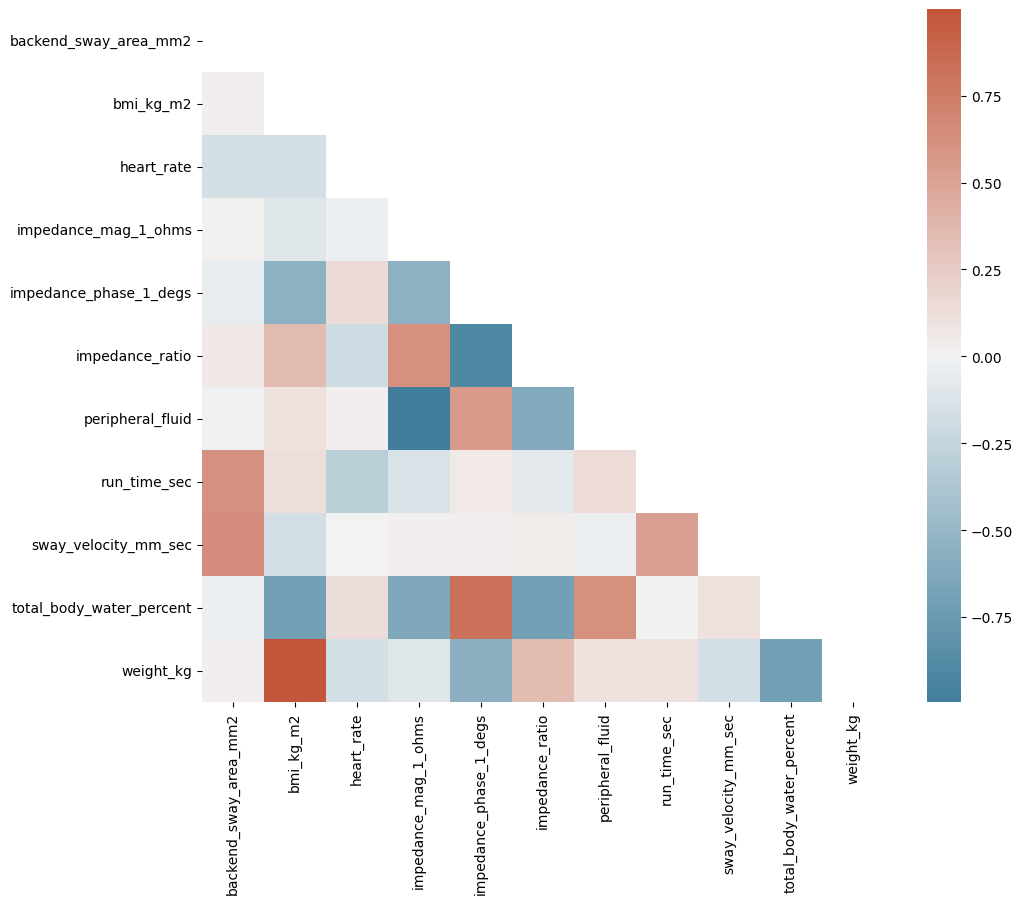

In [84]:
corr = selected_bodyport_df.corr()
# corr[(corr < 0.9) & (corr > -0.9)] = 0
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask)


In [5]:
np.sum(df_bodyport.isna())

id                             0
user_id                        0
identity_id                    0
created_at                     0
updated_at                     0
retrieved_at                   0
subsource                      0
creation_date                  0
event_date                     0
backend_sway_area_mm2        629
bmi_kg_m2                      0
device_id                      0
end_code                       0
heart_rate                  8268
impedance_mag_1_ohms        3247
impedance_phase_1_degs      3248
impedance_ratio             3123
muuid                          0
patient_id                     0
peripheral_fluid            2263
run_time_sec                   0
sway_velocity_mm_sec        7387
total_body_water_percent    3256
uuid                           0
weight_kg                      0
record_id                      0
date                           0
dtype: int64

In [29]:
df_bodyport[df_bodyport['user_id'] == 'user_id']

,id,user_id,identity_id,created_at,updated_at,retrieved_at,subsource,creation_date,event_date,backend_sway_area_mm2,...,muuid,patient_id,peripheral_fluid,run_time_sec,sway_velocity_mm_sec,total_body_water_percent,uuid,weight_kg,record_id,date
0,923238,29,138,2021-08-21 23:14:06.724909,2021-10-29 19:15:52.356001,2021-08-21 22:59:37,weight,2021-08-21 22:59:37,2021-08-21,75.0,...,BP2049B128BN08212122595200gm,bodyport-29-1,2.16,14.5,11.5,47.6,uFJDY32i7SU5nyfcRc9gexghJNmJEX,85.71,sema4_5,2021-08-21
1,876691,29,138,2021-08-18 14:14:06.303632,2021-10-29 19:15:56.916405,2021-08-18 13:56:58,weight,2021-08-18 13:56:58,2021-08-18,104.0,...,BP2049B128BN08182113571200gj,bodyport-29-1,2.02,12.5,14.7,46.2,uFJDY32i7SU5nyfcRc9gexghJNmJEX,85.12,sema4_5,2021-08-18
2,794087,29,138,2021-08-11 22:14:06.428484,2021-10-29 19:16:05.214963,2021-08-11 21:46:16,weight,2021-08-11 21:46:16,2021-08-11,77.0,...,BP2049B128BN08112121463400g8,bodyport-29-1,2.25,16.9,10.3,48.5,uFJDY32i7SU5nyfcRc9gexghJNmJEX,86.39,sema4_5,2021-08-11
3,760941,29,138,2021-08-08 17:19:42.953571,2021-10-29 19:16:09.39447,2021-08-08 17:17:37,weight,2021-08-08 17:17:37,2021-08-08,82.0,...,BP2049B128BN08082117175300fy,bodyport-29-1,2.03,14.7,13.6,46.7,uFJDY32i7SU5nyfcRc9gexghJNmJEX,83.80,sema4_5,2021-08-08
4,754181,29,138,2021-08-07 18:14:31.72311,2021-10-29 19:16:10.723977,2021-08-07 18:07:04,weight,2021-08-07 18:07:04,2021-08-07,87.0,...,BP2049B128BN08072118072000fw,bodyport-29-1,2.09,14.2,14.0,47.9,uFJDY32i7SU5nyfcRc9gexghJNmJEX,82.76,sema4_5,2021-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66009,13519829,2654,8499,2022-11-09 12:42:58.097449,2022-11-09 12:42:58.097449,2022-11-09 12:20:57,weight,2022-11-09 12:20:57,2022-11-09,81.0,...,BP2128B192CK1109221221170006,143a132a-aa98-4a0c-ae57-0c1ac2b857de,2.07,19.7,15.2,44.1,Xcc85TSDsAQw5rAuZRUGnuBkYe8iKk,75.22,sema4_799,2022-11-09
66010,13519830,2654,8499,2022-11-09 12:42:58.125909,2022-11-09 12:42:58.125909,2022-11-09 12:20:29,weight,2022-11-09 12:20:29,2022-11-09,247.0,...,BP2128B192CK1109221220360005,143a132a-aa98-4a0c-ae57-0c1ac2b857de,2.06,6.3,NaN,43.5,Xcc85TSDsAQw5rAuZRUGnuBkYe8iKk,76.74,sema4_799,2022-11-09
66011,13495177,2654,8499,2022-11-08 12:45:30.583557,2022-11-08 12:45:30.583557,2022-11-08 12:39:38,weight,2022-11-08 12:39:38,2022-11-08,51.0,...,BP2128B192CK1108221239570003,143a132a-aa98-4a0c-ae57-0c1ac2b857de,2.08,17.7,8.8,43.8,Xcc85TSDsAQw5rAuZRUGnuBkYe8iKk,76.52,sema4_799,2022-11-08
66012,13478419,2654,8499,2022-11-08 00:49:21.416032,2022-11-08 00:49:21.416032,2022-11-08 00:37:59,weight,2022-11-08 00:37:59,2022-11-08,251.0,...,BP2128B192CK1108220038260002,143a132a-aa98-4a0c-ae57-0c1ac2b857de,2.31,26.2,22.8,46.0,Xcc85TSDsAQw5rAuZRUGnuBkYe8iKk,77.69,sema4_799,2022-11-08


In [85]:
def good_user(user_id, start_date, end_date, threshold=0.05, leq=True):
    selected_data_bodyport = df_bodyport[df_bodyport['user_id'] == user_id]
    # print(user)
    date_range = pd.date_range(start_date, end_date, freq='d')
    date_df = pd.DataFrame()
    date_df['date'] = date_range
    selected_data_bodyport['date'] = selected_data_bodyport['date'].astype('datetime64')
    selected_data_bodyport = pd.merge(date_df, selected_data_bodyport, how='left')
    weight_na_rate = np.max(np.sum(selected_data_bodyport['weight_kg'].isna()))/len(selected_data_bodyport)
    # print(selected_data_bodyport)
    # print(weight_na_rate)
    if leq:
        return weight_na_rate <= threshold
    else:
        return weight_na_rate >= threshold
    


In [86]:
good_user_lst = []
bad_user_lst = []
for user in data['bodyport']['user_id'].unique():
    if len(df_birth[df_birth.user_id == user].birth_date):
        curr_birth_date = pd.to_datetime(df_birth[df_birth.user_id == user].birth_date.values[0])
        # only interested in the 3rd trimester
        start_date = curr_birth_date - timedelta(days=200)
        end_date = curr_birth_date + timedelta(days=100)
        if good_user(user, start_date, end_date, threshold=0.1):
            good_user_lst.append(user)
        if good_user(user, start_date, end_date, threshold=0.4, leq=False):
            bad_user_lst.append(user)

print(len(good_user_lst))
print(good_user_lst)
print(len(bad_user_lst))
print(bad_user_lst)

2
[1393, 1724]
178
[29, 65, 67, 185, 225, 594, 963, 966, 976, 978, 985, 987, 1366, 1422, 1423, 1435, 1709, 1719, 1729, 1755, 1966, 1993, 1996, 2018, 2066, 2071, 2120, 2130, 2170, 2171, 47, 66, 94, 405, 408, 428, 595, 750, 1363, 1370, 1432, 1439, 1703, 1717, 1743, 2092, 30, 44, 62, 114, 124, 199, 279, 404, 406, 602, 622, 983, 997, 1038, 1374, 1383, 1700, 1706, 1988, 2004, 2060, 2068, 2104, 2174, 2176, 41, 61, 70, 99, 101, 158, 174, 193, 200, 280, 291, 599, 600, 977, 1000, 1001, 1021, 1368, 1698, 1720, 1730, 1753, 2016, 2151, 2158, 37, 45, 173, 734, 975, 998, 1016, 1387, 1389, 1391, 1437, 1440, 1441, 1442, 1443, 1453, 1712, 1721, 1745, 2000, 2006, 2031, 2058, 2062, 2100, 2160, 2173, 2212, 79, 135, 234, 972, 988, 1023, 1044, 1369, 1695, 1697, 1731, 1744, 1977, 1994, 1997, 2017, 2065, 2101, 40, 84, 122, 186, 615, 1004, 1018, 1045, 1367, 1378, 1702, 1746, 1749, 1759, 1992, 1999, 2014, 2032, 2061, 2064, 2159, 2166, 2175, 605, 969, 984, 1005, 1047, 1365, 1400, 1723, 2085, 2094, 2106, 2117, 21

In [5]:
df_survey = data['surveys']
survey_question_str = 'swollen'
df_edema = get_survey_question(df_survey, survey_question_str)
df_edema[df_edema['user_id'] == 293][['answer_text', 'date']]

,answer_text,date
1158,1,2021-09-25
1275,1,2021-09-26
1338,1,2021-09-26
1382,1,2021-09-28
1460,1,2021-11-04
...,...,...
109008,4,2021-12-15
111466,5,2021-12-19
111471,5,2021-12-22
115680,5,2022-01-01


In [16]:
import datetime
df_birth = data_load(data_keys={'birth'})['birth']
pd.to_datetime(df_birth[df_birth.user_id == 293].birth_date.values[0])
pd.to_datetime(df_birth[df_birth.user_id == 293].birth_date.values[0]) - datetime.timedelta(days=91)

Timestamp('2021-10-03 00:00:00')

In [10]:


df_puqe = data['surveys'].loc[data['surveys']['title']=='PUQE']
puqe_user_lst = []
for u in df_puqe['user_id'].unique():
    # 53, 54, 132, 404
    # 404: 'During the past week, did you experience any nausea?'
    # 132: 'On average in a day, for how long do you feel nauseated or sick to your stomach?'
    # 53: 'On average in a day, how many times do you vomit or throw up?'
    # 54: 'On average in a day, how many times have you had retching or dry heaves without bringing anything up?'
    selected_user_puqe = df_puqe[df_puqe['user_id'] == u]
    every_date = selected_user_puqe['date'].unique()
    count = 0
    for d in every_date:
        if len(selected_user_puqe.loc[(selected_user_puqe['date'] == d) & (selected_user_puqe['question_id'] == 404)]):
            if (selected_user_puqe.loc[(selected_user_puqe['date'] == d) & (selected_user_puqe['question_id'] == 404)]['answer_text'].iloc[0]) == 'Yes':
                count += 1
    puqe_user_lst.append((u, count))
most_user = sorted(puqe_user_lst, key=lambda x: x[1], reverse=True)[0][0]

selected_user_puqe = df_puqe[df_puqe['user_id'] == 1032]
selected_user_puqe
sorted_select = sorted(puqe_user_lst, key=lambda x: x[1], reverse=True)
list(map(lambda x: x[0], sorted_select))

# user 1032 has most puqe

[1032,
 581,
 407,
 290,
 1436,
 1000,
 95,
 1386,
 1431,
 992,
 1717,
 1441,
 122,
 977,
 293,
 114,
 1700,
 1696,
 1744,
 622,
 291,
 1661,
 173,
 192,
 1373,
 84,
 1425,
 1393,
 1432,
 1378,
 225,
 1753,
 2084,
 969,
 280,
 99,
 53,
 983,
 2068,
 193,
 2056,
 289,
 2016,
 2109,
 127,
 1437,
 1995,
 1706,
 1966,
 2015,
 186,
 137,
 1658,
 2083,
 1383,
 429,
 279,
 1403,
 2126,
 2093,
 1719,
 1035,
 1427,
 168,
 1391,
 405,
 65,
 599,
 1002,
 1387,
 1724,
 1731,
 1697,
 1745,
 1996,
 2001,
 2041,
 1005,
 80,
 1435,
 985,
 2113,
 28,
 1757,
 2100,
 1038,
 94,
 2104,
 1710,
 2032,
 1730,
 2017,
 1728,
 409,
 202,
 2038,
 1985,
 1989,
 1041,
 1001,
 2080,
 1366,
 1708,
 2159,
 1999,
 1440,
 1699,
 2142,
 978,
 1024,
 38,
 64,
 118,
 86,
 39,
 2034,
 1701,
 2002,
 2120,
 1992,
 44,
 2018,
 987,
 1422,
 1755,
 1703,
 404,
 1044,
 1759,
 1990,
 2152,
 2149,
 2065,
 1369,
 67,
 428,
 79,
 212,
 54,
 1423,
 1709,
 2067,
 471,
 37,
 68,
 98,
 101,
 596,
 1370,
 2174,
 1047,
 2151,
 2171,
 410,

In [ ]:
data['bodyport']['subsource'].unique()
# subsource is only `weight`

In [ ]:
data_bodyport = data['bodyport']
users = data_bodyport['user_id'].unique().tolist()
most_data_user = -1
most_data = -1
for u in users:
    num_data = len(data_bodyport[data_bodyport['user_id'] == u])
    if num_data > most_data:
        most_data = num_data
        most_data_user = u
most_data_user
# userid 74 has the most data for bodyport
# userid 293 has the most data for daily surveys

In [ ]:
data_bodyport.columns.tolist()

In [ ]:
selected_data_bodyport = data_bodyport[data_bodyport['user_id'] == 74][['date', 'impedance_ratio', 'peripheral_fluid', 'impedance_mag_1_ohms', 'impedance_phase_1_degs', 'weight_kg']].groupby("date", as_index = False).mean()


In [ ]:
data_oura_activity = data['oura_activity']
data_oura_activity[data_oura_activity['user_id'] == 74]
data_oura_sleep = data['oura_sleep']
# target_user_sleep = data_oura_sleep[data_oura_sleep['user_id'] == 74]
# target_user_sleep[['hr_5min', 'date']]

In [ ]:
data_oura_activity.columns.tolist()

In [ ]:
selected_data_oura_activity = data_oura_activity[data_oura_activity['user_id'] == 74][[
 'cal_active',
 'cal_total',
 'daily_movement',
 'high',
 'inactive',
#  'inactivity_alerts',
 'low',
 'medium',
 'met_min_high',
 'met_min_inactive',
 'met_min_low',
 'met_min_medium',
 'non_wear',
 'rest',
#  'rest_mode_state',
#  'score',
#  'score_meet_daily_targets',
#  'score_move_every_hour',
#  'score_recovery_time',
#  'score_stay_active',
#  'score_training_frequency',
#  'score_training_volume',
 'steps',
 'date']]

In [ ]:
def get_min_date(df):
    return np.min(df['date'])
def get_max_date(df):
    return np.max(df['date'])

In [ ]:

# # union
# overall_min_date = np.min([get_min_date(selected_data_bodyport), get_min_date(selected_data_oura_activity)])
# overall_max_date = np.max([get_max_date(selected_data_bodyport), get_max_date(selected_data_oura_activity)])

# intercept
overall_min_date = np.max([get_min_date(selected_data_bodyport), get_min_date(selected_data_oura_activity)])
overall_max_date = np.min([get_max_date(selected_data_bodyport), get_max_date(selected_data_oura_activity)])

date_range = pd.date_range(overall_min_date, overall_max_date, freq='d')
overall_df = pd.DataFrame()
overall_df['date'] = date_range
selected_data_bodyport['date'] = selected_data_bodyport['date'].astype('datetime64')
selected_data_oura_activity['date'] = selected_data_oura_activity['date'].astype('datetime64')
overall_df = pd.merge(overall_df, selected_data_bodyport, how='left')
overall_df = pd.merge(overall_df, selected_data_oura_activity, how='left')


In [ ]:
np.sum(overall_df.isna())

In [ ]:
overall_df.describe()

In [ ]:
overall_df.loc[overall_df['impedance_ratio'] > 10,'impedance_ratio'] = np.nan
np.sum(overall_df.isna())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=overall_df, x="date", y="non_wear")



In [ ]:
overall_df_filled = overall_df.fillna(method="ffill")
#sns.scatterplot(data=overall_df_filled, x="date", y="non_wear")
sns.scatterplot(x=overall_df_filled["date"], y=overall_df_filled["non_wear"])

In [ ]:
overall_df_filled = overall_df_filled.drop('date', axis=1)
overall_df_filled.to_csv('/mnt/results/user_72_activity_bodyport_ffilled.csv', index=False, header=False)
overall_df_without_date = overall_df.drop('date', axis=1)
overall_df_without_date.to_csv('/mnt/results/user_72_activity_bodyport_unfilled.csv', index=False, header=False)

In [ ]:
overall_df_filled.columns.to_list()

In [ ]:
len(overall_df_filled.columns.to_list())

In [ ]:
np.sum(overall_df_filled.isna())

In [ ]:
len(overall_df_filled)

In [ ]:
# hyperimpute requires python 3.7
from hyperimpute.plugins.imputers import Imputers
import numpy as np
imputers = Imputers()

imputers.list()
method = 'hyperimpute'
plugin = Imputers().get(method)
X = overall_df_without_date
out = plugin.fit_transform(X.copy())

print(method, out)

In [ ]:
hyperimputed_df_without_date = out
hyperimputed_df_without_date.to_csv('/mnt/results/user_72_activity_bodyport_hyperimpute.csv', index=False, header=False)

In [ ]:
hyperimputed_df_without_date['date'] = date_range

In [ ]:
sns.scatterplot(x=hyperimputed_df_without_date["date"], y=hyperimputed_df_without_date["impedance_ratio"], hue=overall_df['impedance_ratio'].isna())